In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import squarify
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-placements-prediction/collegePlace.csv


In [2]:
df = pd.read_csv('/kaggle/input/engineering-placements-prediction/collegePlace.csv')
print(df.head(), '\n\n')
print(df.shape)

   Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1   


(2966, 8)


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


# **EDA**

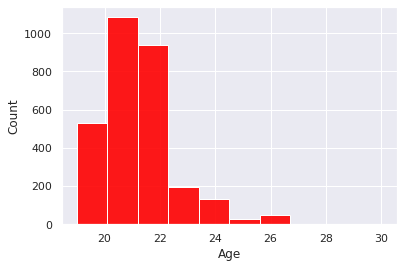

In [4]:
sns.histplot(df['Age'], bins = 10, color = 'red', alpha = .9)
plt.show()

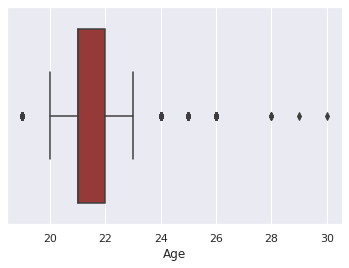

In [5]:
sns.boxplot(df['Age'], color = 'brown')
plt.show()

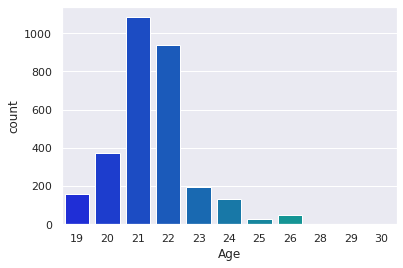

In [6]:
sns.countplot(df['Age'], palette = 'winter')
plt.show()

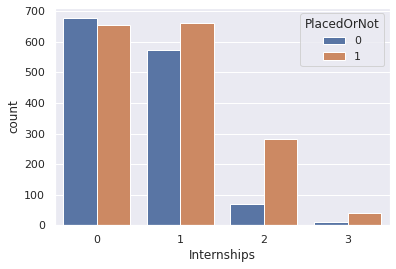

In [7]:
sns.countplot(df['Internships'], hue = df['PlacedOrNot'])
plt.show()

# **Machine Learning Models**

train_test_split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['PlacedOrNot', 'Gender', 'Stream'], axis=1), df.PlacedOrNot, test_size=0.33, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=200, random_state=101)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=101)

Predictions and Evaluation Metrics

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score

def eval_metrics(yt, model):
    prediction = model.predict(X_test)
    print('Confusion matrix : \n', confusion_matrix(yt, prediction), '\n\n\n\n')
    print('Classification report : \n' ,classification_report(yt, prediction), '\n\n\n\n')
    print('Accuracy score : ' ,accuracy_score(yt, prediction), '\n')

In [13]:
eval_metrics(y_test, rfc)

Confusion matrix : 
 [[407  25]
 [ 98 449]] 




Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       432
           1       0.95      0.82      0.88       547

    accuracy                           0.87       979
   macro avg       0.88      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979
 




Accuracy score :  0.874361593462717 



Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(random_state=101)
lr.fit(X_train, y_train)

LogisticRegressionCV(random_state=101)

In [15]:
eval_metrics(y_test, lr)

Confusion matrix : 
 [[325 107]
 [132 415]] 




Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       432
           1       0.80      0.76      0.78       547

    accuracy                           0.76       979
   macro avg       0.75      0.76      0.75       979
weighted avg       0.76      0.76      0.76       979
 




Accuracy score :  0.7558733401430031 



Support Vector Machine

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
eval_metrics(y_test, svc)

Confusion matrix : 
 [[321 111]
 [132 415]] 




Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       432
           1       0.79      0.76      0.77       547

    accuracy                           0.75       979
   macro avg       0.75      0.75      0.75       979
weighted avg       0.75      0.75      0.75       979
 




Accuracy score :  0.7517875383043923 



KNN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

In [19]:
knn = KNeighborsClassifier( n_neighbors=18).fit(X_train, y_train)

In [20]:
eval_metrics(y_test, knn)

Confusion matrix : 
 [[412  20]
 [101 446]] 




Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       432
           1       0.96      0.82      0.88       547

    accuracy                           0.88       979
   macro avg       0.88      0.88      0.88       979
weighted avg       0.89      0.88      0.88       979
 




Accuracy score :  0.8764044943820225 



Choosing the Right K Value

In [21]:
error_rate = []
for x in range(4,30):
    knn = KNeighborsClassifier( n_neighbors=x).fit(X_train, y_train)
    xpred = knn.predict(X_test)
    error_rate.append(mean_absolute_error(xpred, y_test))

Text(0.5, 1.0, 'Error rate vs Kvalue')

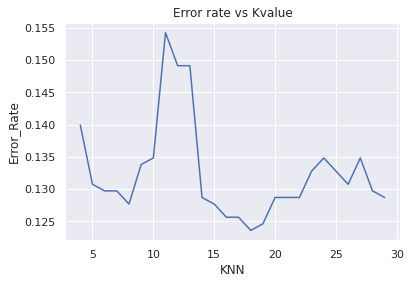

In [22]:
plt.plot(range(4,30), error_rate,)
plt.xlabel('KNN')
plt.ylabel('Error_Rate')
plt.title('Error rate vs Kvalue')

Best KNN value is 18 based on the plot.